In [ ]:
# Import necessary libraries
import re
import string
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import xgboost as xgb

In [ ]:

# Load data
df = pd.read_csv('xy_train.csv')  # Replace with your actual file path


Basic information about the dataset

In [ ]:
print(df.head())

   ID                                               text  label
0   0  Americans Aren't Sure If Flight 370 Vanished T...      1
1   1  Pope Leo X offering indulgences to sinners sho...      0
2   2  News: 5 Uplifting Hypotheticals Of What Could ...      0
3   3  George W. Bush and Jeb Bush at a campaign stop...      0
4   4  The WADA requesting their fair share from Lanc...      0


In [ ]:
df.shape

(48000, 3)

In [ ]:
df.columns

Index(['ID', 'text', 'label'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      48000 non-null  int64 
 1   text    48000 non-null  object
 2   label   48000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


Cleaning the dataset

In [ ]:
df.isnull().sum()

,0
ID,0
text,0
label,0


Visualization of data

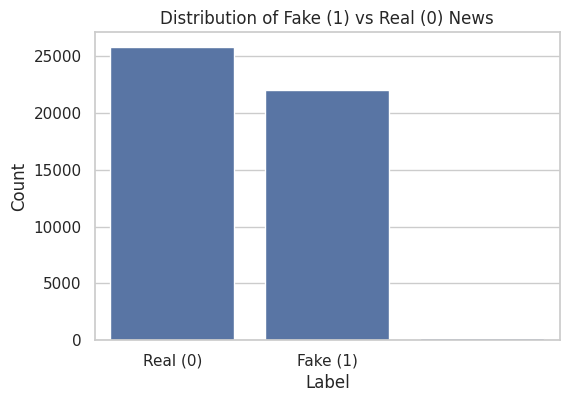

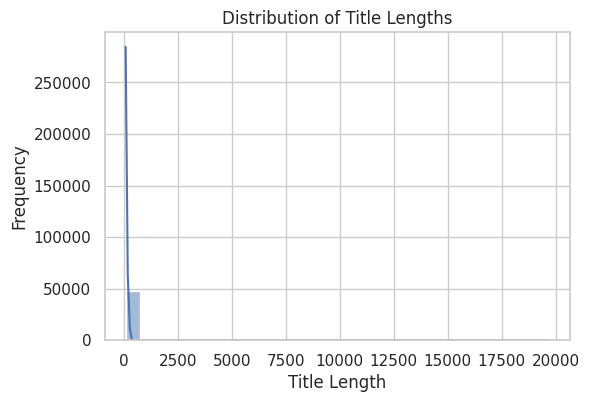

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset if not already loaded
# df = pd.read_csv('your_file.csv')  # Uncomment if needed

# Set style for better visuals
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Distribution of Fake (1) vs Real (0) News
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Distribution of Fake (1) vs Real (0) News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Real (0)', 'Fake (1)'])
plt.show()

# 2. Title Length Distribution (based on 'text')
df['title_length'] = df['text'].fillna('').apply(len)
plt.figure(figsize=(6, 4))
sns.histplot(df['title_length'], kde=True, bins=30)
plt.title('Distribution of Title Lengths')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()


Data Preprocessing

In [ ]:
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

# Download NLTK stopwords if not already done
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

# Apply preprocessing to 'text' column
df['processed_text'] = df['text'].apply(preprocess_text)

# Check a sample
print(df[['text', 'processed_text']].head())



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  \
0  Americans Aren't Sure If Flight 370 Vanished T...   
1  Pope Leo X offering indulgences to sinners sho...   
2  News: 5 Uplifting Hypotheticals Of What Could ...   
3  George W. Bush and Jeb Bush at a campaign stop...   
4  The WADA requesting their fair share from Lanc...   

                                      processed_text  
0  americans arent sure flight 370 vanished thank...  
1  pope leo x offering indulgences sinners shortl...  
2  news 5 uplifting hypotheticals could happen ba...  
3  george w bush jeb bush campaign stop fathers r...  
4  wada requesting fair share lance armstrong via...  


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000)
X_count = count_vectorizer.fit_transform(df['processed_text'])

# Check the shape
print(X_count.shape)


(48000, 5000)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_text'])

# Check the shape
print(X_tfidf.shape)


(48000, 5000)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:23:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Random Forest Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("📌 Random Forest Evaluation")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


# XGBoost Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("\n📌 XGBoost Evaluation")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))



📌 Random Forest Evaluation
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78      5102
           1       0.75      0.74      0.75      4466
           2       1.00      0.06      0.12        32

    accuracy                           0.76      9600
   macro avg       0.84      0.53      0.55      9600
weighted avg       0.76      0.76      0.76      9600


📌 XGBoost Evaluation
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.70      0.75      5102
           1       0.70      0.82      0.76      4466
           2       0.50      0.03      0.06        32

    accuracy                           0.76      9600
   macro avg       0.67      0.52      0.52      9600
weighted avg       0.76      0.76      0.75      9600



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Random Forest Hyperparameter Tuning
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# XGBoost Hyperparameter Tuning
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.01]
}

xgb_grid = GridSearchCV(xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
                        xgb_params, cv=3, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:17:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
pip install mlflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 700.2/700.2 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.1 MB/s eta 0:00:00


In [ ]:
import mlflow
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

mlflow.set_experiment("Fake News Detection")

with mlflow.start_run(run_name="RandomForest_vs_XGBoost"):

    # Random Forest Evaluation
    y_pred_rf = best_rf.predict(X_test)
    y_prob_rf = best_rf.predict_proba(X_test)[:, 1]
    rf_acc = accuracy_score(y_test, y_pred_rf)


    mlflow.log_metric("RandomForest Accuracy", rf_acc)

    mlflow.sklearn.log_model(best_rf, "RandomForestModel")

    print("🔍 Random Forest")
    print("Classification Report:\n", classification_report(y_test, y_pred_rf))


    # XGBoost Evaluation
    y_pred_xgb = best_xgb.predict(X_test)
    y_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]
    xgb_acc = accuracy_score(y_test, y_pred_xgb)


    mlflow.log_metric("XGBoost Accuracy", xgb_acc)
    mlflow.sklearn.log_model(best_xgb, "XGBoostModel")

    print("🔍 XGBoost")
    print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


    mlflow.end_run()


2025/05/05 02:25:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🔍 Random Forest
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78      5102
           1       0.76      0.74      0.75      4466
           2       1.00      0.06      0.12        32

    accuracy                           0.77      9600
   macro avg       0.84      0.53      0.55      9600
weighted avg       0.77      0.77      0.76      9600



2025/05/05 02:25:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🔍 XGBoost
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.66      0.73      5102
           1       0.68      0.83      0.75      4466
           2       0.00      0.00      0.00        32

    accuracy                           0.74      9600
   macro avg       0.50      0.50      0.49      9600
weighted avg       0.75      0.74      0.74      9600



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Final single prediction
sample_text = ["Aliens have landed on the White House lawn, government confirms."]
sample_vector = tfidf_vectorizer.transform(sample_text)

# Predict using the better model (example: XGBoost)
prediction = best_xgb.predict(sample_vector)[0]
print("🧠 Final Prediction:", "Fake" if prediction == 1 else "Real")


🧠 Final Prediction: Fake
